# Python para ciencias de datos: Notación Big 0

### Ejercicio: 

- Investigar y comprender diferentes tipos de algoritmos clasificados según su notación Big O,
y posteriormente implementar un código en Python que grafique la complejidad de estos
algoritmos usando *matplotlib* y _time_.

------------------------------------------------------------------------------------------------------

1. *0(1) - Constante* 

    - *Descripción:* La complejidad constante indica que el tiempo de ejecucion no cambia con el tamaño de la entrada.

    - *Ejemplo:* Acceso a un elemento en un array

In [1]:
# Importamos  librerías necesarias

import time
import matplotlib.pyplot as plt

In [2]:
def algoritmo_constante(n):
    return  n[0] # Accede al primer elemento de la lista

2. *0(log n) - Logarítmica*

    -*Descripción:* La complejidad logarítmica indica que el tiempo de ejecución crece de manera logarítmica con el tamaño de la entrada.

    -*Ejemplo:* Busqueda binaria

In [3]:
def algoritmo_logaritmico(n, x):
    # Inicializa las variables izq (izquierda) y der (derecha) para los límites del rango de búsqueda
    izq, der = 0, len(n) - 1
    
    # Mientras el índice izquierdo sea menor o igual al índice derecho
    while izq <= der:
        # Calcula el índice medio del rango de búsqueda actual
        medio = (izq + der) // 2
        
        # Si el elemento en el índice medio es igual a x, devuelve el índice medio
        if n[medio] == x:
            return medio
        # Si el elemento en el índice medio es menor que x, ajusta el límite izquierdo
        elif n[medio] < x:
            izq = medio + 1
        # Si el elemento en el índice medio es mayor que x, ajusta el límite derecho
        else:
            der = medio - 1
    
    # Si no se encuentra el elemento, devuelve -1
    return -1



3. *O(n) - Lineal*

    - *Descripción:* La complejidad lineal indica que el tiempo de ejecucion crece linealmente con el tamanio de entrada.

    -*Ejemplo:* Busqueda en un array desordenado

In [4]:
def algoritmo_lineal(n, x):
    # Itera a través de cada índice 'i' en el rango del tamaño de la lista 'n'
    for i in range(len(n)):
        # Si el elemento en el índice 'i' es igual a 'x', devuelve el índice 'i'
        if n[i] == x:
            return i
    # Si el bucle termina sin encontrar 'x', devuelve -1
    return -1


4. *O(n log n) - Linealitmica*

    - *Descripción:* La complejidad linealítmica indica que el tiempo de ejecución crece en función del producto del tamaño de la entrada y su logaritmo.

    - *Ejemplo:* Ordenamiento por mezcla (merge sort).

In [5]:
def ordenamiento_mezcla(arr):
    # Si el tamaño del array es mayor a 1, se puede dividir
    if len(arr) > 1:
        # Encuentra el punto medio del array
        medio = len(arr) // 2
        
        # Divide el array en dos mitades
        L = arr[:medio]  # Mitad izquierda
        R = arr[medio:]  # Mitad derecha

        # Llamada recursiva a merge_sort en cada mitad
        ordenamiento_mezcla(L)
        ordenamiento_mezcla(R)

        # Inicializa los índices para iterar sobre las sublistas y el array original
        i = j = k = 0

        # Mezcla las dos mitades en un array ordenado
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Si quedan elementos en L, los copia
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        # Si quedan elementos en R, los copia
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


5. *0(n^2) - Cuadrática*

    - *Descripción:* La complejidad cuadrática indica que el tiempo de ejecución crece cuadráticamente con el tamaño de la entrada.

    - *Ejemplo:* Ordenamiento de burbuja (bubble sort)

In [6]:
def ordenamiento_burbuja(arr):
    # Obtiene la longitud del array
    n = len(arr)
    
    # Recorre todos los elementos del array
    for i in range(n):
        # El último i elementos ya están en su lugar correcto
        for j in range(0, n-i-1):
            # Compara el elemento actual con el siguiente
            if arr[j] > arr[j+1]:
                # Si el elemento actual es mayor, intercámbialo con el siguiente
                arr[j], arr[j+1] = arr[j+1], arr[j]


6. *O(2^n) - Exponencial*

    - *Descripción:* La complejidad exponencial indica que el tiempo de ejecución se duplica con cada incremento de uno en el tamaño de la entrada.

    - *Ejemplo:* Algoritmo para resolver el problema de la subsecuencia mas larga (recursivo)

In [7]:
def scl(X, Y, m, n):
    # Caso base: Si alguna de las cadenas tiene longitud 0, la SCL es 0
    if m == 0 or n == 0:
        return 0
    # Si el último carácter de ambas cadenas es el mismo
    elif X[m-1] == Y[n-1]:
        # Suma 1 al resultado y llama recursivamente con las cadenas reducidas
        return 1 + scl(X, Y, m-1, n-1)
    else:
        # Si el último carácter no es el mismo, calcula la SCL excluyendo el último
        # carácter de una cadena y luego de la otra, y toma el máximo de ambas posibilidades
        return max(scl(X, Y, m, n-1), scl(X, Y, m-1, n))



#### Implementamos cada uno de estos algoritmos en python y medimos su tiempo de ejecucion utilizando "time"

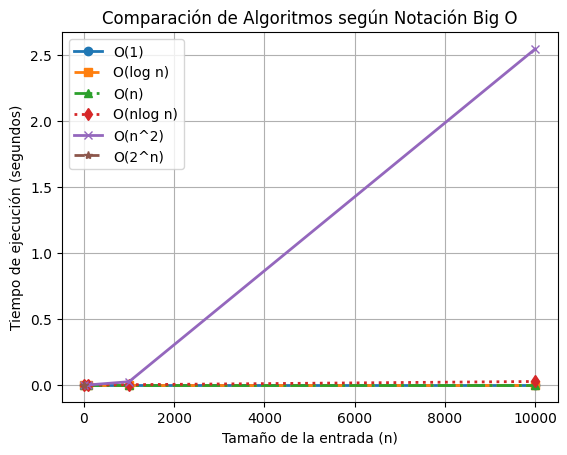

In [8]:
# Función para medir tiempo de ejecución
def medir_tiempo(func, *args):
    tiempo_inicio = time.time()
    func(*args)
    tiempo_fin = time.time()
    return tiempo_fin - tiempo_inicio

# Tamaños de entrada
tamaños_n = [10, 100, 1000, 10000]
tiempos_constante = [medir_tiempo(algoritmo_constante, list(range(n))) for n in tamaños_n]
tiempos_logaritmico = [medir_tiempo(algoritmo_logaritmico, list(range(n)), n//2) for n in tamaños_n]
tiempos_lineal = [medir_tiempo(algoritmo_lineal, list(range(n)), n//2) for n in tamaños_n]
tiempos_ordenamiento_mezcla = [medir_tiempo(ordenamiento_mezcla, list(range(n))) for n in tamaños_n]
tiempos_ordenamiento_burbuja = [medir_tiempo(ordenamiento_burbuja, list(range(n))) for n in tamaños_n]
tiempos_scl = [medir_tiempo(scl, list(range(n)), list(range(n)), n, n) for n in tamaños_n if n <= 20]  # Reducir tamaño para evitar tiempos de ejecución excesivos

# Crear gráfica
plt.plot(tamaños_n, tiempos_constante, label='O(1)', linewidth=2, linestyle='-', marker='o')
plt.plot(tamaños_n, tiempos_logaritmico, label='O(log n)', linewidth=2, linestyle='--', marker='s')
plt.plot(tamaños_n, tiempos_lineal, label='O(n)', linewidth=2, linestyle='-.', marker='^')
plt.plot(tamaños_n, tiempos_ordenamiento_mezcla, label='O(nlog n)', linewidth=2, linestyle=':', marker='d')
plt.plot(tamaños_n, tiempos_ordenamiento_burbuja, label='O(n^2)', linewidth=2, linestyle='-', marker='x')
plt.plot(tamaños_n[:len(tiempos_scl)], tiempos_scl, label='O(2^n)', linewidth=2, linestyle='--', marker='*') # Solo para valores hasta 20


plt.xlabel('Tamaño de la entrada (n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de Algoritmos según Notación Big O')
plt.legend()
plt.grid(True) # Agregar cuadrícula para una mejor visualización
plt.show()
